In [1]:
import os
import pandas as pd
from newsapi import NewsApiClient
%matplotlib inline

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [6]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [8]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2020-05-16,J.K. Rowling has been drinking a lot and you'd...,0.7650,0.171,0.000,0.829
1,2020-05-08,"Yesterday, the prominent bitcoin investor Mich...",0.3182,0.067,0.000,0.933
2,2020-04-30,"Two years ago, the venture firm Andreessen Hor...",0.2732,0.081,0.051,0.867
3,2020-05-08,"Early next week, Bitcoin is about to experienc...",0.2716,0.061,0.000,0.939
4,2020-05-13,Over the last few weeks all eyes in the crypto...,0.0000,0.000,0.000,1.000


In [50]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2020-05-20,Editors note:Andreessen Horowitzs Crypto Start...,0.0000,0.000,0.000,1.000
1,2020-04-30,"Two years ago, the venture firm Andreessen Hor...",0.2732,0.081,0.051,0.867
2,2020-05-14,Use this to send Ether from one account to ano...,0.6249,0.141,0.000,0.859
3,2020-05-24,"Some open-source groups, such as The Linux Fou...",-0.4457,0.031,0.086,0.882
4,2020-05-12,With unemployment surging and businesses strug...,0.0000,0.148,0.148,0.703


In [51]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,90.000000,90.000000,90.000000,90.000000
mean,0.170334,0.073867,0.040067,0.886089
std,0.426301,0.065641,0.062786,0.078990
min,-0.848100,0.000000,0.000000,0.629000
25%,0.000000,0.000000,0.000000,0.839250
50%,0.273200,0.076000,0.000000,0.909500
75%,0.507000,0.094000,0.058750,0.933000
max,0.893400,0.297000,0.244000,1.000000


In [52]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,97.000000,97.000000,97.000000,97.000000
mean,0.280731,0.089866,0.023052,0.887062
std,0.351351,0.073286,0.041909,0.086120
min,-0.476700,0.000000,0.000000,0.607000
25%,0.000000,0.000000,0.000000,0.845000
50%,0.340000,0.103000,0.000000,0.880000
75%,0.612400,0.130000,0.054000,0.946000
max,0.848100,0.313000,0.203000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [53]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

lemmatizer = WordNetLemmatizer()
regex = re.compile("[^a-zA-Z ]")

In [115]:
# Expand the default stopwords list if necessary
sw = set(stopwords.words('english'))
sw_adds = {"''", '``', "'…", "'char", 'I', 'The'}

In [116]:
# Complete the tokenizer function
def tokenizer(text):
       
    # Create a list of the words
    word_list = word_tokenize(text)
    
    # Convert the words to lowercase  
    word_list = list(filter(lambda word: word.lower(), word_list))
    
    # Remove the punctuation
    word_list = list(filter(lambda word: word not in punctuation, word_list))
    
    # Remove the stopwords
    word_list = list(filter(lambda word: word not in sw, word_list))
    word_list = list(filter(lambda word: word not in sw.union(sw_adds), word_list))
    
    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in word_list]
    
    
    return tokens


In [117]:
# Create a new tokens column for bitcoin
bitcoin_df['tokens'] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-05-16,J.K. Rowling has been drinking a lot and you'd...,0.7650,0.171,0.000,0.829,"[J.K., Rowling, drinking, lot, 'd, better, bel..."
1,2020-05-08,"Yesterday, the prominent bitcoin investor Mich...",0.3182,0.067,0.000,0.933,"[Yesterday, prominent, bitcoin, investor, Mich..."
2,2020-04-30,"Two years ago, the venture firm Andreessen Hor...",0.2732,0.081,0.051,0.867,"[Two, year, ago, venture, firm, Andreessen, Ho..."
3,2020-05-08,"Early next week, Bitcoin is about to experienc...",0.2716,0.061,0.000,0.939,"[Early, next, week, Bitcoin, experience, third..."
4,2020-05-13,Over the last few weeks all eyes in the crypto...,0.0000,0.000,0.000,1.000,"[Over, last, week, eye, crypto, world, glued, ..."


In [118]:
# Create a new tokens column for ethereum
ethereum_df['tokens'] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-05-20,Editors note:Andreessen Horowitzs Crypto Start...,0.0000,0.000,0.000,1.000,"[Editors, note, Andreessen, Horowitzs, Crypto,..."
1,2020-04-30,"Two years ago, the venture firm Andreessen Hor...",0.2732,0.081,0.051,0.867,"[Two, year, ago, venture, firm, Andreessen, Ho..."
2,2020-05-14,Use this to send Ether from one account to ano...,0.6249,0.141,0.000,0.859,"[Use, send, Ether, one, account, another, smar..."
3,2020-05-24,"Some open-source groups, such as The Linux Fou...",-0.4457,0.031,0.086,0.882,"[Some, open-source, group, Linux, Foundation, ..."
4,2020-05-12,With unemployment surging and businesses strug...,0.0000,0.148,0.148,0.703,"[With, unemployment, surging, business, strugg..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [119]:
from collections import Counter
from nltk import ngrams

In [120]:
# Generate the Bitcoin N-grams where N=2
bitcoin_words = tokenizer(''.join(str(bitcoin_df['tokens'].tolist())))
(pd.Series(ngrams(bitcoin_words, 2)).value_counts())

('Satoshi, 'Nakaboto)           30
('Bitcoin, 'BTC)                18
('Our, 'robot)                  15
('Nakaboto, 'tell)              15
('Today, 'Satoshi)              15
                                ..
('make, 'blockchains)            1
(U.S, 'China)                    1
('the…, '+5290)                  1
('Bitcoin, '+3041)               1
('investor, 'cryptocurrency)     1
Length: 1572, dtype: int64

In [121]:
# Generate the Ethereum N-grams where N=2
ethereum_words = tokenizer(''.join(str(ethereum_df['tokens'].tolist())))
(pd.Series(ngrams(ethereum_words, 2)).value_counts())

('would, 'need)              20
('Ethereum, 'would)          20
('day, 'ahead)               20
('major, 'resistance)        20
('ahead, 'Ethereum)          20
                             ..
('participant, 'around)       1
('blockchain, 'tech)          1
('invest…, '+4122)            1
('fait, 'partie)              1
('research, 'containment)     1
Length: 1673, dtype: int64

In [122]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [123]:
# Get the top 10 words for Bitcoin
token_count(bitcoin_words, 10)

[("'Bitcoin", 74),
 ("'Satoshi", 31),
 ("'Nakaboto", 30),
 ("'bitcoin", 28),
 ("'every", 23),
 ("'day", 19),
 ("'BTC", 19),
 ("'another", 18),
 ("'whats", 17),
 ("'Welcome", 16)]

In [124]:
# Get the top 10 words for Ethereum
token_count(ethereum_words, 10)

[("'Ethereum", 48),
 ("'day", 41),
 ("'EOS", 41),
 ("'level", 41),
 ("'would", 38),
 ("'market", 22),
 ("'major", 22),
 ("'first", 21),
 ("'need", 21),
 ("'play", 21)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [125]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

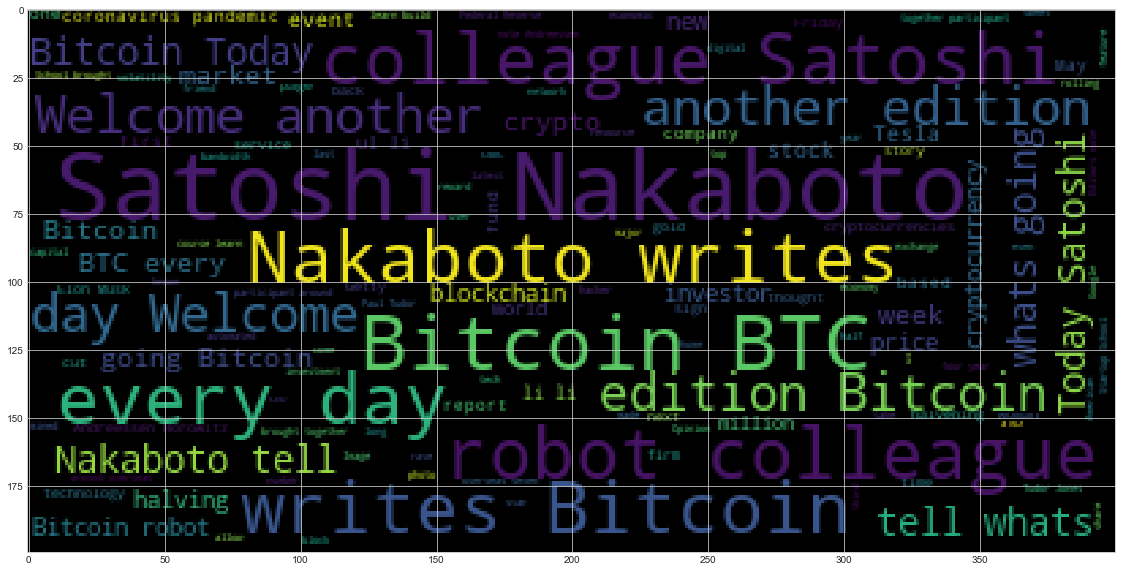

In [127]:
# Generate the Bitcoin word cloud
bitcoin_string = ' '.join(bitcoin_words)
btc_wc = WordCloud().generate(bitcoin_string)
plt.imshow(btc_wc)

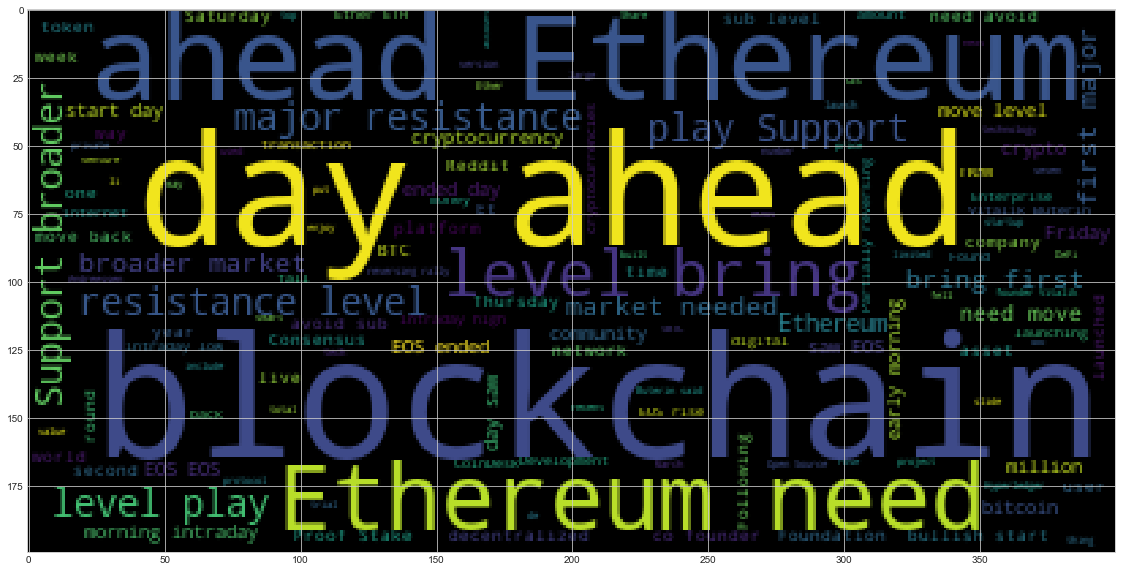

In [128]:
# Generate the Ethereum word cloud
ethereum_string = ' '.join(ethereum_words)
eth_wc = WordCloud().generate(ethereum_string)
plt.imshow(eth_wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [130]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [131]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [135]:
# Concatenate all of the bitcoin text together
# This is called bitcoin_string, I did this previously when making the word clouds
bitcoin_string

"J.K 'Rowling 'drinking 'lot 'd 'better 'believe 'thought 'Bitcoin 'NotedTERF 'author 'Cuckoos 'Calling 'Rowlingdecided 'Friday 'perfect 'time 'learn 'about… '+2124 'Yesterday 'prominent 'bitcoin 'investor 'Michael 'Terpin 'announced 'hed 'filed 'suit 'ringleader 'SIM 'swap 'gang 'hed 'chasing 'since '2018 'following 'theft 'roughly '+2243 'Two 'year 'ago 'venture 'firm 'Andreessen 'Horowitz 'a16z 'took 'wrap 'dedicated 'crypto 'fund 'subset 'limited 'partner 'whod 'provided 'firm '300 'million 'capital 'commit… '+2478 'Early 'next 'week 'Bitcoin 'experience 'third-ever 'halving 'hugely 'important 'event 'could 'shift 'balance 'power 'within 'network 'Historically 'event 'also 'called 'halv… '+7424 'Over 'last 'week 'eye 'crypto 'world 'glued 'halvening 'nigh-religious 'moment 'blockchain 'realm 'Every 'amount 'new 'bitcoin 'mined '— 'distri… '+4849 'Since 'first 'Bitcoin 'block 'generated 'back '2009 'three 'halving 'event 'Taking 'place 'every '210,000 'block 'mined 'approximately 'e

In [137]:
# Run the NER processor on all of the text
btc_ner = nlp(bitcoin_string)
# Add a title to the document
btc_ner.user_data["title"]= "Bitcoing NER"

In [138]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [151]:
# List all Entities
print([(ent.text, ent.label_) for ent in btc_ner.ents])

[('Bitcoin', 'GPE'), ("Calling 'Rowlingdecided 'Friday 'perfect 'time 'learn 'about… '+2124", 'WORK_OF_ART'), ('Yesterday', 'DATE'), ("Michael 'Terpin '", 'PERSON'), ('2018', 'DATE'), ("'Two 'year 'ago 'venture 'firm 'Andreessen 'Horowitz 'a16z", 'WORK_OF_ART'), ("300 'million", 'MONEY'), ('Bitcoin', 'PERSON'), ('third', 'ORDINAL'), ('Bitcoin', 'GPE'), ('2009', 'DATE'), ('three', 'CARDINAL'), ('210,000', 'CARDINAL'), ('Bitcoin', 'GPE'), ("13 'billion", 'MONEY'), ('6', 'CARDINAL'), ('Thursday', 'DATE'), ('evening', 'TIME'), ('Bitcoin', 'PERSON'), ('March', 'DATE'), ('16', 'DATE'), ('Reuters', 'ORG'), ('five', 'CARDINAL'), ('bitcoin', 'PERSON'), ('Wednesday', 'DATE'), ('morning', 'TIME'), ('Goldman', 'WORK_OF_ART'), ('2012', 'WORK_OF_ART'), ('Satoshi', 'PERSON'), ('Bitcoin', 'PERSON'), ('Bitcoin', 'PERSON'), ("Today 'Satoshi 'Nakaboto '", 'WORK_OF_ART'), ('Bitcoin', 'PERSON'), ('Satoshi', 'PERSON'), ('Bitcoin', 'PERSON'), ("Today 'Satoshi 'Nakaboto '", 'WORK_OF_ART'), ('Bitcoin', 'PERSON

---

## Ethereum NER

In [147]:
# Concatenate all of the bitcoin text together
# This is called ethereum_string, I did this previously when making the word clouds
ethereum_string

"'Editors 'note 'Andreessen 'Horowitzs 'Crypto 'Startup 'School 'brought 'together '45 'participant 'around U.S 'overseas 'seven-week 'course 'learn 'build 'crypto 'company 'Andreessen 'Ho… '+2503 'Two 'year 'ago 'venture 'firm 'Andreessen 'Horowitz 'a16z 'took 'wrap 'dedicated 'crypto 'fund 'subset 'limited 'partner 'whod 'provided 'firm '300 'million 'capital 'commit… '+2478 'Use 'send 'Ether 'one 'account 'another 'smart 'contract 'address 'It 'requires 'parameter 'depending 'transaction 'Possible 'parameter 'include 'value 'gas '+206 'Some 'open-source 'group 'Linux 'Foundation 'deal 'Others n't 'fortunate 'Some 'Drupal 'Foundation 'Open 'Source 'Initiative 'OSI 'Open 'Source 'Matters 'Joomla a… '+1202 'With 'unemployment 'surging 'business 'struggling 'lockdown 'million 'Americans 'relying 'extra 'benefit 'payment 'issued 2 'trillion 'dollar 'Coronavirus 'Aid 'Relief 'Ec… '+5094 'Over 'last 'week 'eye 'crypto 'world 'glued 'halvening 'nigh-religious 'moment 'blockchain 'realm 'Eve

In [148]:
# Run the NER processor on all of the text
eth_ner = nlp(ethereum_string)
# Add a title to the document
eth_ner.user_data["title"]= "Ethereum NER"

In [149]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [152]:
# List all Entities
print([(ent.text, ent.label_) for ent in eth_ner.ents])

[('45', 'DATE'), ('U.S', 'GPE'), ("seven-week '", 'DATE'), ("Two 'year 'ago '", 'DATE'), ("Horowitz 'a16z", 'WORK_OF_ART'), ("300 'million", 'MONEY'), ("'Linux 'Foundation '", 'ORG'), ("Some 'Drupal 'Foundation 'Open 'Source 'Initiative 'OSI 'Open 'Source 'Matters 'Joomla", 'WORK_OF_ART'), ('Americans', 'NORP'), ('2', 'CARDINAL'), ('week', 'DATE'), ('Libra', 'GPE'), ('March', 'DATE'), ('1500', 'WORK_OF_ART'), ('hundred', 'CARDINAL'), ('li', 'PERSON'), ('13', 'WORK_OF_ART'), ('6', 'CARDINAL'), ('Thursday', 'DATE'), ('evening', 'TIME'), ('Bitcoin', 'PERSON'), ('March', 'DATE'), ('16', 'DATE'), ("'Special '", 'WORK_OF_ART'), ('Kevin', 'PERSON'), ('Chen', 'PERSON'), ("Round 5 'Gitcoin 'Grants", 'WORK_OF_ART'), ('250,000', 'CARDINAL'), ("somewhere 'Sure '", 'WORK_OF_ART'), ('Entrepreneur', 'WORK_OF_ART'), ('2020', 'DATE'), ("Bitcoin '", 'WORK_OF_ART'), ('Java', 'PERSON'), ('CoinDesk', 'PERSON'), ("Nolan 'Baurle '", 'WORK_OF_ART'), ("Hudson 'Jameson '", 'WORK_OF_ART'), ('Getty', 'PERSON'), (